In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn torch torchvision optuna shap lime fastapi uvicorn docker



     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/275.7 kB 1.3 MB/s eta 0:00:01
     ---------------- --------------------- 122.9/275.7 kB 1.2 MB/s eta 0:00:01
     --------------------------------- ---- 245.8/275.7 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.2 MB 1.9 MB/s eta 0:01:47
   ---------------------------------------- 0.1/204.2 MB 1.8 MB/s eta 0:01:55
   --------------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# data loading and preprocessing steps are here in this block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Load dataset
df = pd.read_csv(r"C:\Users\ether\OneDrive\Documents\assignment_imago\MLE-Assignment.csv")  # data loading 

# Data Exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
Dataset Overview:
 None

First 5 Rows:
            hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.6

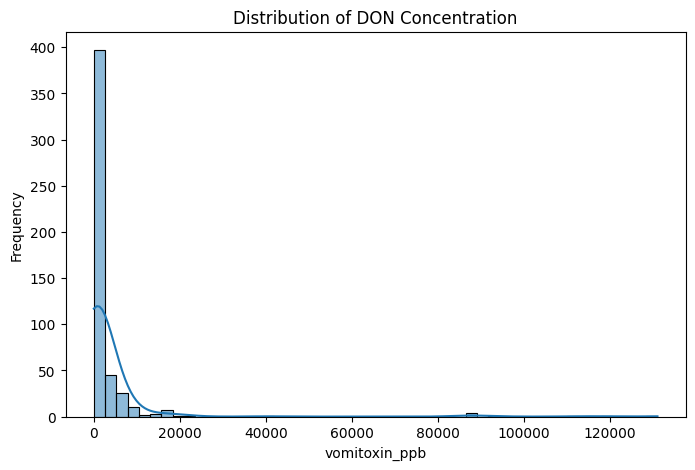

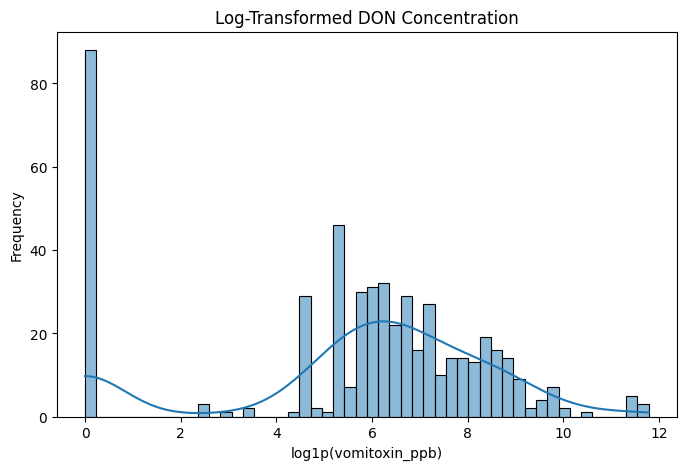

Outliers detected: 80
Train samples: 336, Test samples: 84


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r"C:\Users\ether\OneDrive\Documents\assignment_imago\MLE-Assignment.csv"  # Update if necessary
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Overview:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())

# Drop the identifier column
df.drop(columns=["hsi_id"], inplace=True)

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"\nTotal Missing Values: {missing_values}")

# Define features (X) and target (y)
X = df.iloc[:, :-1].values  # Spectral features
y = df["vomitoxin_ppb"].values  # Target variable

# Check distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of DON Concentration")
plt.xlabel("vomitoxin_ppb")
plt.ylabel("Frequency")
plt.show()

# Apply log transformation to reduce skewness
y_log = np.log1p(y)

# Visualize log-transformed target
plt.figure(figsize=(8,5))
sns.histplot(y_log, bins=50, kde=True)
plt.title("Log-Transformed DON Concentration")
plt.xlabel("log1p(vomitoxin_ppb)")
plt.ylabel("Frequency")
plt.show()

# Outlier detection using IQR method
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (y < lower_bound) | (y > upper_bound)
print(f"Outliers detected: {np.sum(outliers)}")

# Optionally remove outliers
X_filtered = X[~outliers]
y_filtered = y_log[~outliers]

# Normalize spectral features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.2, random_state=42)

print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


In [10]:
print(df.vomitoxin_ppb)

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 500, dtype: float64


In [5]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

Epoch [10/5000], Loss: 19.3870
Epoch [20/5000], Loss: 9.8948
Epoch [30/5000], Loss: 10.6884
Epoch [40/5000], Loss: 10.0451
Epoch [50/5000], Loss: 9.9060
Epoch [60/5000], Loss: 9.8893
Epoch [70/5000], Loss: 9.8279
Epoch [80/5000], Loss: 9.8145
Epoch [90/5000], Loss: 9.7854
Epoch [100/5000], Loss: 9.7591
Epoch [110/5000], Loss: 9.7350
Epoch [120/5000], Loss: 9.7099
Epoch [130/5000], Loss: 9.6830
Epoch [140/5000], Loss: 9.6544
Epoch [150/5000], Loss: 9.6241
Epoch [160/5000], Loss: 9.5919
Epoch [170/5000], Loss: 9.5575
Epoch [180/5000], Loss: 9.5206
Epoch [190/5000], Loss: 9.4806
Epoch [200/5000], Loss: 9.4368
Epoch [210/5000], Loss: 9.3884
Epoch [220/5000], Loss: 9.3340
Epoch [230/5000], Loss: 9.2721
Epoch [240/5000], Loss: 9.2011
Epoch [250/5000], Loss: 9.1190
Epoch [260/5000], Loss: 9.0042
Epoch [270/5000], Loss: 8.8803
Epoch [280/5000], Loss: 8.7318
Epoch [290/5000], Loss: 8.5497
Epoch [300/5000], Loss: 8.3460
Epoch [310/5000], Loss: 8.1172
Epoch [320/5000], Loss: 7.8657
Epoch [330/500

c:\Users\ether\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


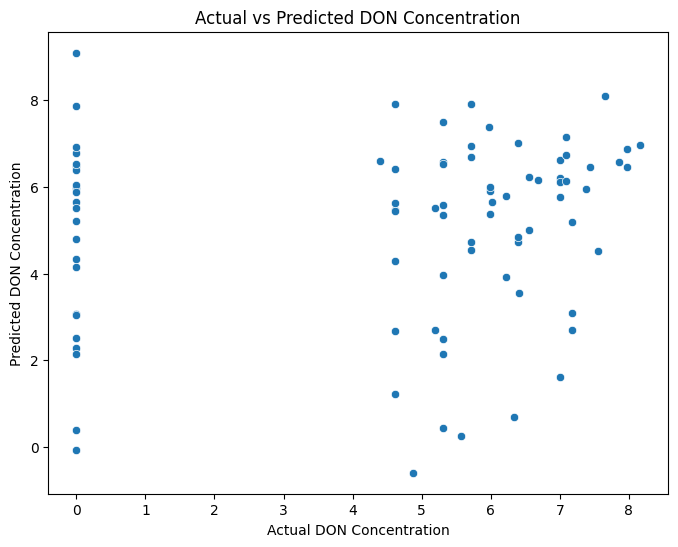

In [15]:


# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define Neural Network Model
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = MLPRegressor(input_dim)

# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Predictions
y_pred_tensor = model(X_test_tensor)
y_pred = y_pred_tensor.detach().numpy()

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Scatter Plot - Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs Predicted DON Concentration")
plt.show()


In [16]:
%pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 0.2/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 0.5/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:27
   ---------------------------------------- 1.3/124.9 MB 5.7 MB/s eta 0:00:22
    --------------------------------------- 1.9/124.9 MB 7.0 MB/s eta 0:00:18
    --------------------------------------- 2.6/124.9 MB 7.9 MB/s eta 0:00:16
    --------------------------------------- 2.9/124.9 MB 8.1 MB/s eta 0:00:16
   - -------------------------------------- 3.3/124.9 MB 8.1 MB/s eta 0:00:15
   - -------------------------------------- 3.5/124.9 MB 7.6 MB/s eta 0:00:16
   - -------------------------------------- 3.9/124.9 MB 7.8 MB/s eta 0:00:16
   - -------------------------------------- 4.3/124.9 MB 8.0 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\ether\AppData\Local\Temp\ipykernel_4200\438644883.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


RMSE: 10155.8475
R² Score: 0.6310


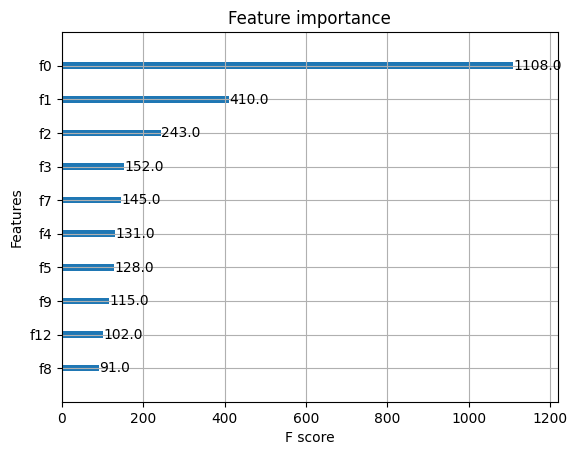

In [18]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\Users\ether\OneDrive\Documents\assignment_imago\MLE-Assignment.csv")  # Replace with actual file path

data.drop(columns=["hsi_id"],inplace=True)
# Assuming the last column is the target (DON concentration), update if needed
X = data.iloc[:, :-1]  # Features (Hyperspectral bands)
y = data.iloc[:, -1]   # Target variable (DON concentration)

# Handle missing values (if any)
X.fillna(X.median(), inplace=True)

# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,  # Number of trees
    learning_rate=0.05,  # Step size shrinkage
    max_depth=6,  # Maximum depth of a tree
    subsample=0.8,  # Fraction of samples used for training
    colsample_bytree=0.8,  # Fraction of features used for training
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Feature Importance
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()


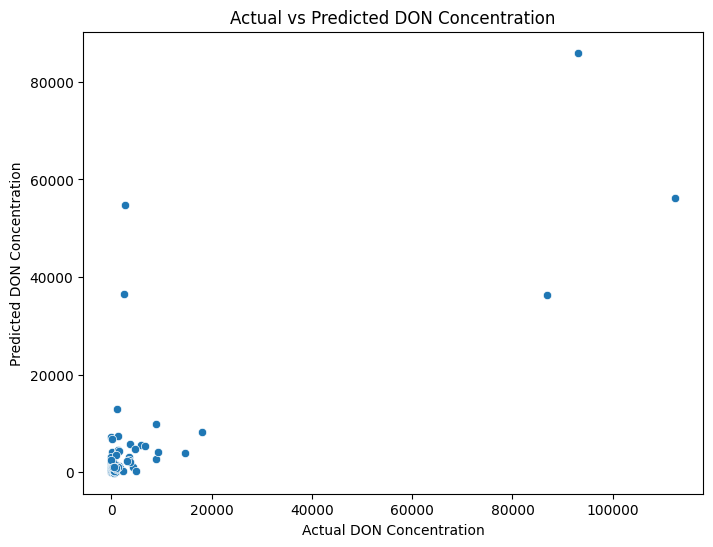

In [20]:
# Scatter Plot - Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs Predicted DON Concentration")
plt.show()

In [21]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0)
    }
    
    model = xgb.XGBRegressor(objective="reg:squarederror", **params, random_state=42)
    
    # 5-fold cross-validation score
    score = cross_val_score(model, X_train_scaled, y_train, scoring="neg_root_mean_squared_error", cv=5)
    return score.mean()  # We minimize RMSE, so higher (less negative) is better

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, n_jobs=-1)

print("Best parameters:", study.best_params)


c:\Users\ether\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-13 15:46:00,507] A new study created in memory with name: no-name-1a366534-e1ae-4fdd-b66f-16fc616d7a74
[I 2025-03-13 15:47:40,256] Trial 5 finished with value: -8254.94986422777 and parameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1808498301908197, 'subsample': 0.9885838678905043, 'colsample_bytree': 0.972125711055583, 'reg_alpha': 0.6337766284466912, 'reg_lambda': 0.01986654717299796}. Best is trial 5 with value: -8254.94986422777.
[I 2025-03-13 15:47:42,259] Trial 3 finished with value: -10836.538048908993 and parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.023471793012563046, 'subsample': 0.5606813706840844, 'colsample_bytree': 0.6938021990034746, 'reg_alpha'

Best parameters: {'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.017733797848816152, 'subsample': 0.9882564906508755, 'colsample_bytree': 0.9526538020735972, 'reg_alpha': 0.8038773339792338, 'reg_lambda': 0.019461434651219967}


In [ ]:
# Best parameters: {'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.017733797848816152, 'subsample': 0.9882564906508755,
#                    'colsample_bytree': 0.9526538020735972, 'reg_alpha': 0.8038773339792338, 'reg_lambda': 0.019461434651219967}

RMSE: 16630.2966
R² Score: 0.0106


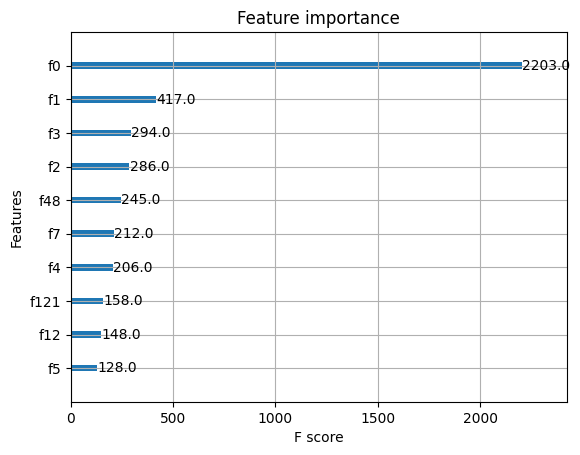

In [22]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=600,  # Number of trees
    learning_rate=0.0177,  # Step size shrinkage
    max_depth=5,  # Maximum depth of a tree
    subsample=0.988,  # Fraction of samples used for training
    colsample_bytree=0.95,  # Fraction of features used for training
    reg_alpha = 0.8038,
    reg_lambda = 0.0194,

    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Feature Importance
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()
